<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Prevents thread conflicts in some environments

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/appliedcode/mthree-c422/refs/heads/main/Exercises/day-5/KMeans/income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


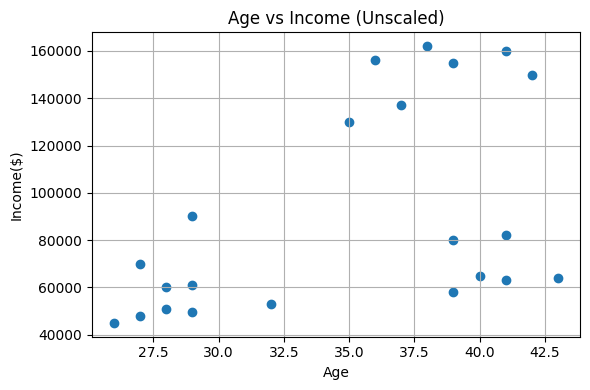

In [3]:
plt.figure(figsize=(6, 4))
plt.scatter(df['Age'], df['Income($)'])
plt.title("Age vs Income (Unscaled)")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.grid(True)
plt.tight_layout()
plt.show()

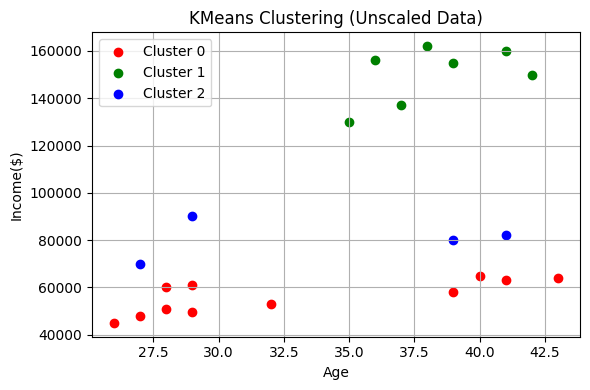

In [4]:
kmeans_raw = KMeans(n_clusters=3, n_init=10)
df['cluster'] = kmeans_raw.fit_predict(df[['Age', 'Income($)']])

# Visualize raw clustering
df_0 = df[df['cluster'] == 0]
df_1 = df[df['cluster'] == 1]
df_2 = df[df['cluster'] == 2]

plt.figure(figsize=(6, 4))
plt.scatter(df_0['Age'], df_0['Income($)'], color='red', label='Cluster 0')
plt.scatter(df_1['Age'], df_1['Income($)'], color='green', label='Cluster 1')
plt.scatter(df_2['Age'], df_2['Income($)'], color='blue', label='Cluster 2')
plt.title("KMeans Clustering (Unscaled Data)")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

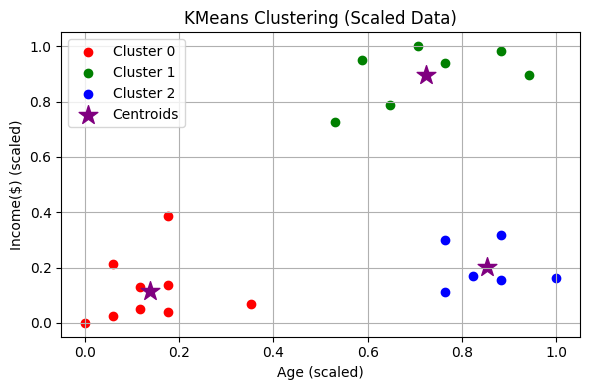

In [5]:
scaler = MinMaxScaler()
df[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])

# KMeans on scaled data
kmeans_scaled = KMeans(n_clusters=3, n_init=10)
df['cluster'] = kmeans_scaled.fit_predict(df[['Age', 'Income($)']])
centers = kmeans_scaled.cluster_centers_

# Visualize scaled clustering
df_0 = df[df['cluster'] == 0]
df_1 = df[df['cluster'] == 1]
df_2 = df[df['cluster'] == 2]

plt.figure(figsize=(6, 4))
plt.scatter(df_0['Age'], df_0['Income($)'], color='red', label='Cluster 0')
plt.scatter(df_1['Age'], df_1['Income($)'], color='green', label='Cluster 1')
plt.scatter(df_2['Age'], df_2['Income($)'], color='blue', label='Cluster 2')
plt.scatter(centers[:, 0], centers[:, 1], color='purple', marker='*', s=200, label='Centroids')
plt.title("KMeans Clustering (Scaled Data)")
plt.xlabel("Age (scaled)")
plt.ylabel("Income($) (scaled)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


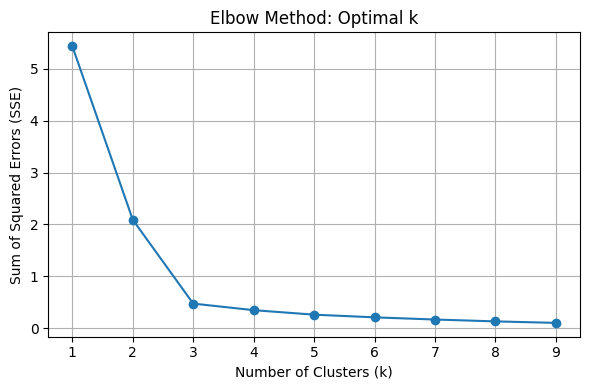

In [6]:
sse = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method: Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)
plt.tight_layout()
plt.show()